# session 4

In [10]:
import os

import sys
sys.path.append('..')

import cv2

import numpy as np

from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel

import matplotlib.pyplot as plt

In [8]:
filepath = os.path.join('..',
                        '..',
                        '..',
                        'cds-vis-data',
                        'data',
                        'img',
                        'trex.png')
filepath

'../../../cds-vis-data/data/img/trex.png'

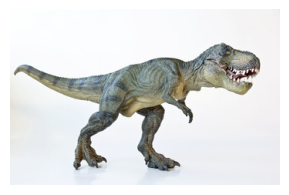

In [9]:
image = cv2.imread(filepath)
show(image)

## blurring with convolutional kernels

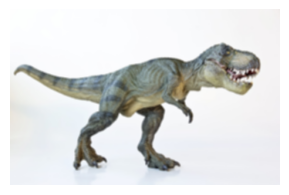

In [18]:
show(cv2.blur(image, (3,3)))

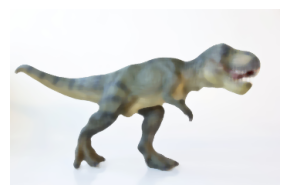

In [23]:
show(cv2.medianBlur(image, 7))

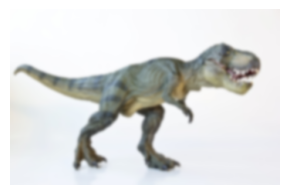

In [37]:
show(cv2.GaussianBlur(image, (9,9), 0))

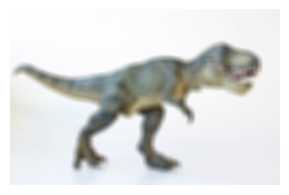

In [36]:
show(cv2.GaussianBlur(image, (9,9), 200))

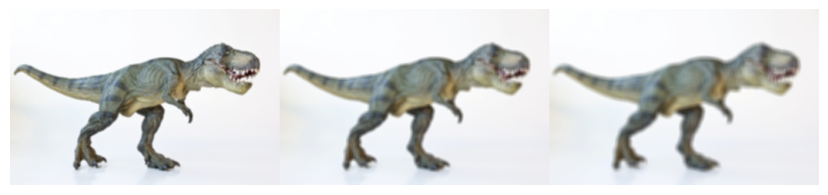

In [41]:
#horizontal stack of arrays. vstack is for vertical arrays.
blurred_stack = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7))
])
show(blurred_stack)

In [43]:
image = (cv2.imread(filepath))

In [44]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) 

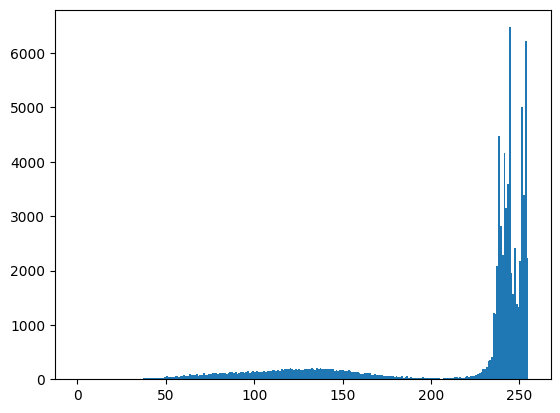

In [48]:
plt.hist(grey_image.flatten(), 255)
plt.show()

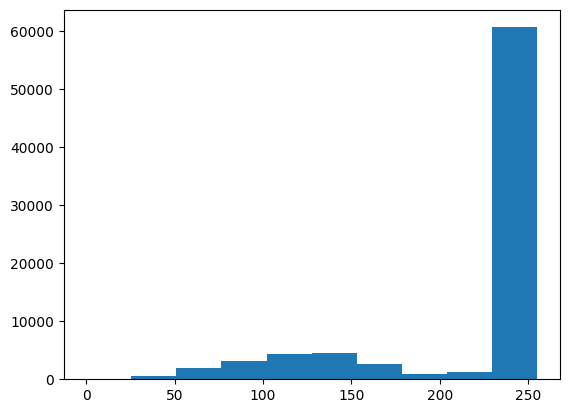

In [49]:
plt.hist(grey_image.flatten(), 10)
plt.show()

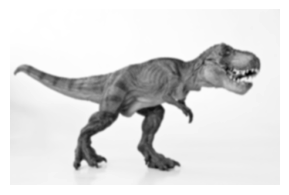

In [55]:
blurred = cv2.GaussianBlur(grey_image, (5,5), 0)
show_channel(blurred)

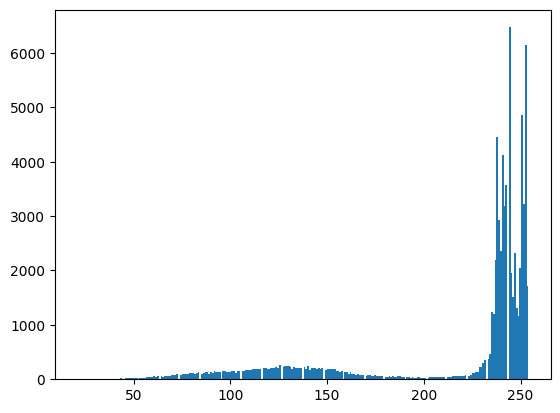

In [56]:
plt.hist(blurred.flatten(), 255)
plt.show()

In [62]:
thresh_value, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

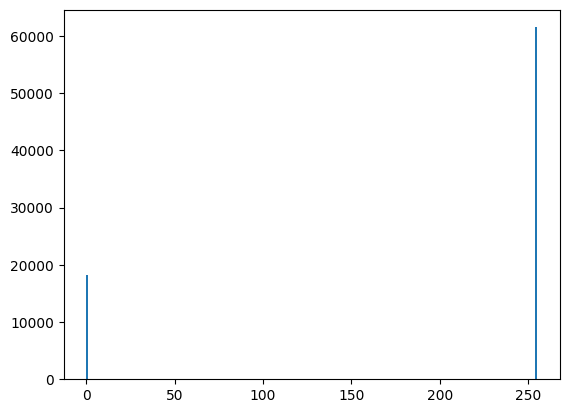

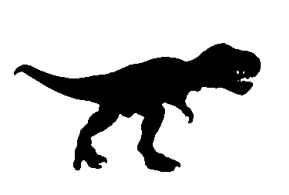

In [64]:
plt.hist(binary_image.flatten(), 255)
show_channel(binary_image)
plt.show()

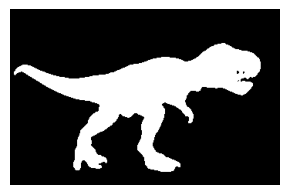

In [65]:
inverted = cv2.bitwise_not(binary_image)
show_channel(inverted)

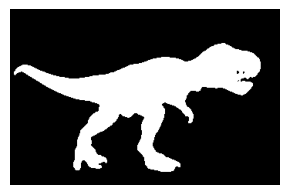

In [67]:
thresh_value, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
show_channel(binary_image)

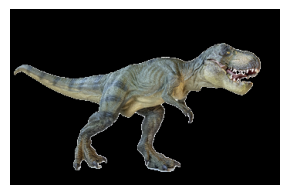

In [72]:
show(cv2.bitwise_and(image, image, mask = inverted))

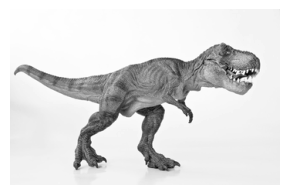

In [73]:
show_channel(grey_image)

# sobel 

In [76]:
sobel_horizontal = cv2.Sobel(grey_image, cv2.CV_64F, 1, 0)
sobel_vertical = cv2.Sobel(grey_image, cv2.CV_64F, 0, 1)

In [78]:
sobel_horizontal = np.uint8(np.absolute(sobel_horizontal))
sobel_vertical = np.uint8(np.absolute(sobel_vertical))

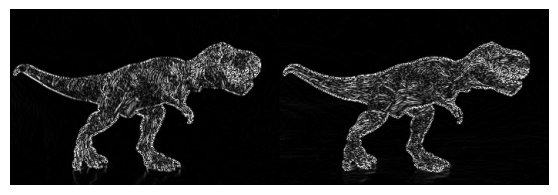

In [79]:
edges = np.hstack([
    sobel_horizontal,
    sobel_vertical
])

show_channel(edges)